![](../images/kurt.jpeg)

### 1.0 Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Though Kurt has been selling used cars for over 20 years, he now wants to focus more on customer satisfaction instead of just sales and profits.  Accordingly, Kurt has asked me to provide a clear picture for what customers care most about in a used car purchase.   Simply put, Kurt asked me this question, "What's the best way to price a used car?".

### 2.0 Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Explore Data

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
# Initial exploration
df = pd.read_csv("../data/vehicles.csv")
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  str    
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  str    
 5   model         421603 non-null  str    
 6   condition     252776 non-null  str    
 7   cylinders     249202 non-null  str    
 8   fuel          423867 non-null  str    
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  str    
 11  transmission  424324 non-null  str    
 12  VIN           265838 non-null  str    
 13  drive         296313 non-null  str    
 14  size          120519 non-null  str    
 15  type          334022 non-null  str    
 16  paint_color   296677 non-null  str    
 17  state         426880 non-null  str    
dtypes: float64(2), 

From the info above, the dataframe has 426880 rows.  Most of the columns have non-null data except for "condition", "cylinders" and "size".  At this point, we don't know if those columns can be dropped or if they are relevent to predicting price.

In [92]:
# Clearly condition, cylinders and size columns have missing data
# Print out the percent data complete for each column, click between table and chart view to see magnitude of missing data
non_null_pct = df.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id              100.000000
region          100.000000
state           100.000000
price           100.000000
year             99.717719
transmission     99.401237
fuel             99.294181
odometer         98.969265
model            98.763821
title_status     98.069247
manufacturer     95.866286
type             78.247283
paint_color      69.498922
drive            69.413653
VIN              62.274644
condition        59.214768
cylinders        58.377530
size             28.232524
dtype: float64

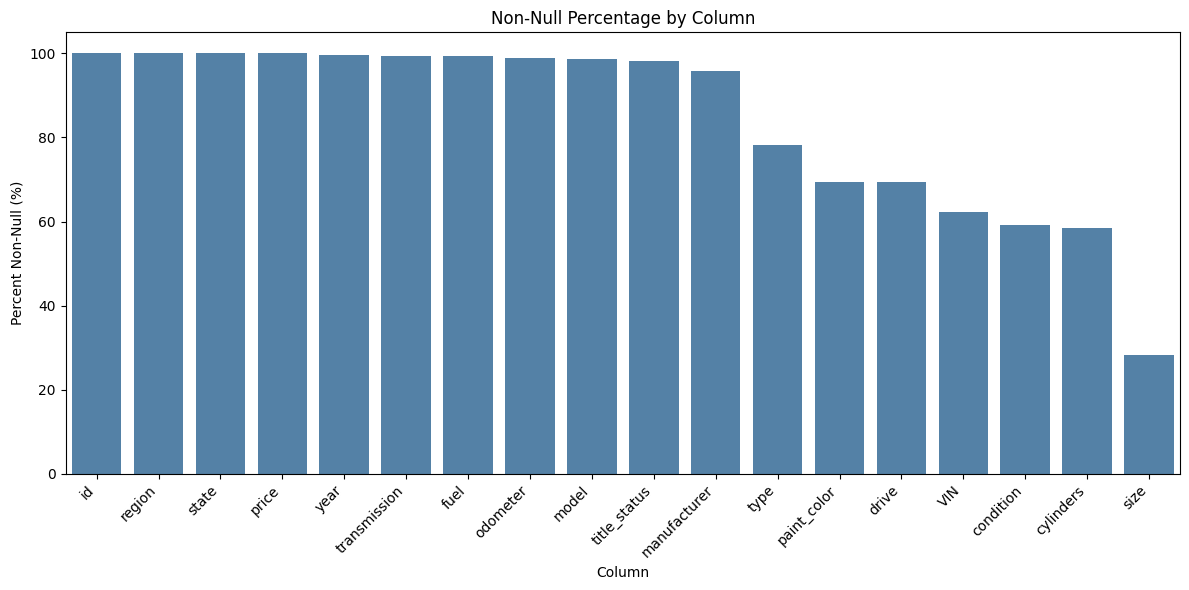

In [93]:
#here's a simple plot of the data above
plt.figure(figsize=(12, 6))

sns.barplot(
    x=non_null_pct.index,
    y=non_null_pct.values,
    color="steelblue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent Non‑Null (%)")
plt.xlabel("Column")
plt.title("Non‑Null Percentage by Column")
plt.tight_layout()
plt.show()


In [94]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


Since only id, price, year and odometer have numeric values, describe only shows these columns.  **Whoa!**  Note the price column, price, has a mean of 7.5199e4, or $75,199 which might be good for new exotic cars, but not used cars.  The max is 3.7 Billion dollars, clearly there is errant data in this dataset.

In [95]:
df["price"].sort_values(ascending=False).head(20)


318592    3736928711
356716    3736928711
257840    3024942282
91576     3024942282
37410     3009548743
184704    1410065407
153082    1234567890
29386     1111111111
37409     1111111111
122470     987654321
280        987654321
230753     135008900
193736     123456789
288356     123456789
307488     123456789
358555     123456789
137807     123456789
207080     123456789
241404     113456789
1838        99999999
Name: price, dtype: int64

From above we can see the top 20 prices range from 3.7 Billion dollars
to  987 Million dollars.  This data needs to be cleaned!

In [96]:
# let's filter out price to be in a reasonable range for a Kurt's used car business.
# Kurt has indicated he only sells cars in the $500 to $25000 range.
df_clean1 = df[df["price"].between(500, 25000)]
df_clean1["price"].describe()

count    271275.000000
mean      11563.731339
std        6664.193732
min         500.000000
25%        5995.000000
50%       10499.000000
75%       16987.000000
max       25000.000000
Name: price, dtype: float64

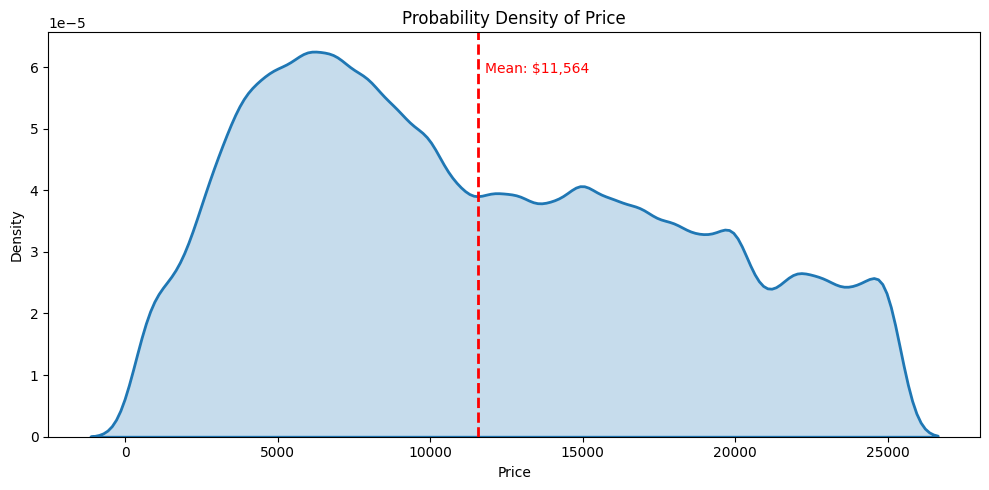

In [97]:
#plot the price probably density function to evaluate sanity of the price column.

plt.figure(figsize=(10, 5))

# KDE / PDF
sns.kdeplot(
    data=df_clean1,
    x="price",
    fill=True,
    linewidth=2
)

# Compute the mean
mean_price = df_clean1["price"].mean()

# Add a vertical line for the mean
plt.axvline(mean_price, color="red", linestyle="--", linewidth=2)

# Add mean text slightly to the right of the line, in a prior version it collided
plt.text(
    mean_price * 1.02,          # shift right by ~2%
    plt.ylim()[1] * 0.9,        # near the top of the plot
    f"Mean: ${mean_price:,.0f}",
    color="red",
    ha="left"                   # left-align so it sits cleanly beside the line
)

plt.title("Probability Density of Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


From the photo that Kurt sent me, the price range, $500-$25000 is consistent with Kurt's attire and the cars I see in the background.

Now for the cleaned dataset, df_clean, let's re-evaluate how much data is missing for size, cylinders, condition, VIN, drive, paint_color, .


In [98]:
# Print out the percent data complete for each column, click between table and chart view to see magnitude of missing data
non_null_pct = df_clean1.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id              100.000000
region          100.000000
state           100.000000
price           100.000000
year             99.868399
transmission     99.517464
odometer         99.420146
fuel             99.313980
model            98.722330
title_status     97.963321
manufacturer     96.026910
type             75.814211
drive            70.161644
paint_color      69.809971
condition        62.622431
cylinders        61.455718
VIN              53.124689
size             33.279513
dtype: float64

From the chart above, there is still a lot of missing data for columns type, drive, pain_color, condition, cylinders, VIN and size.  Intuitively, we know that VIN (Vehicle Indentification Number) would not be of value to the buyer, so we can drop that without further analysis. Our next step is to see if **size** is predictor of price.

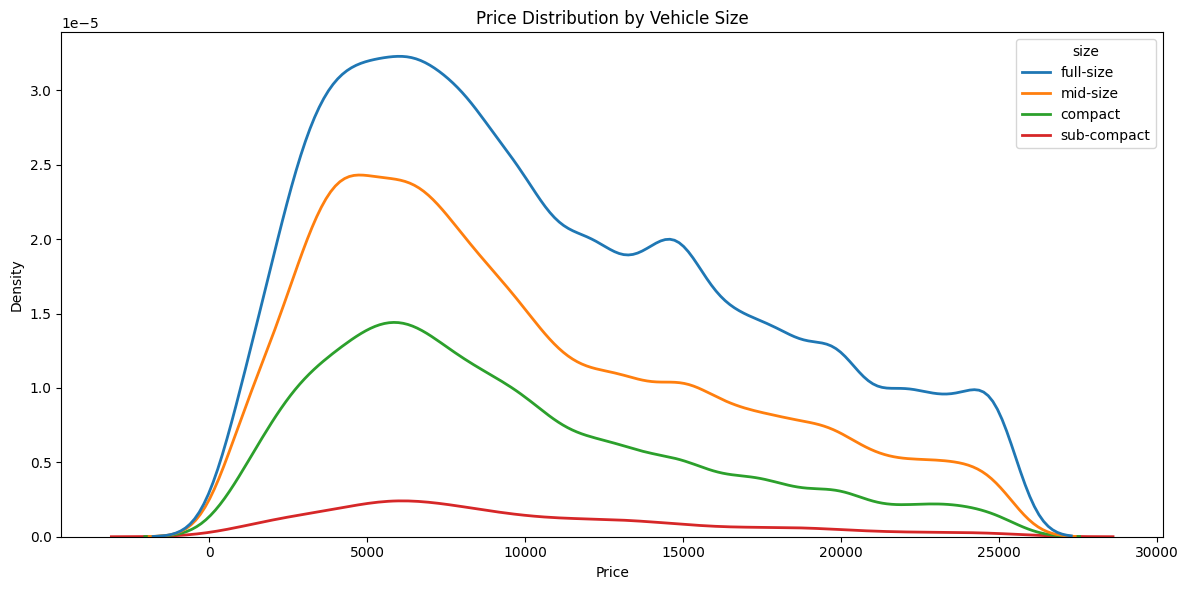

In [99]:
plt.figure(figsize=(12, 6))

sns.kdeplot(
    data=df_clean1,
    x="price",
    hue="size",        # separate curves by size
    fill=False,        # keep it clean
    linewidth=2
)

plt.title("Price Distribution by Vehicle Size")
plt.xlabel("Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


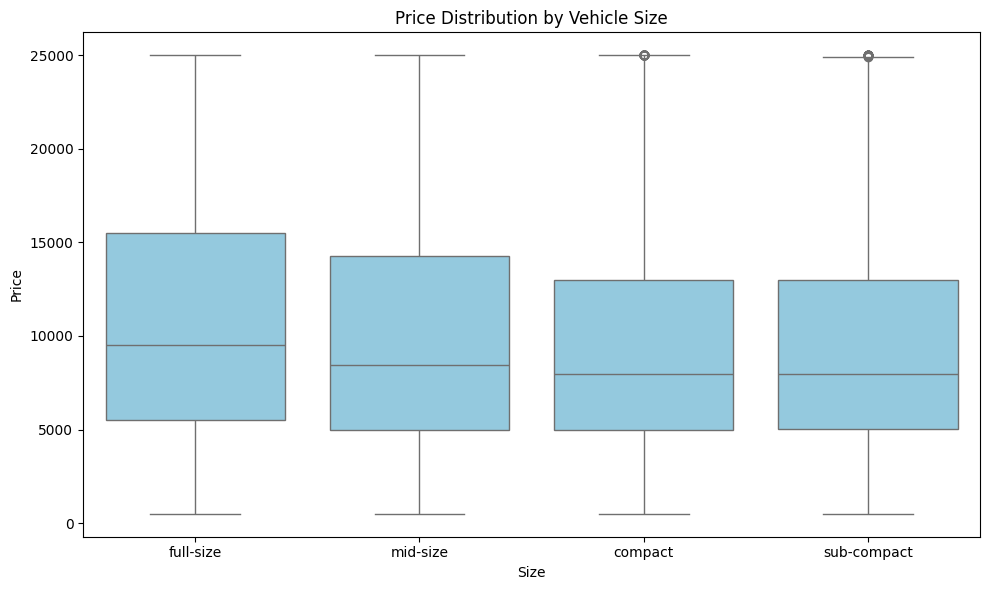

In [100]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean1,
    x="size",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Vehicle Size")
plt.xlabel("Size")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [101]:
df_clean1.groupby("size")["price"].mean().sort_values()


size
compact         9424.277720
sub-compact     9485.799282
mid-size        9947.528665
full-size      10829.477767
Name: price, dtype: float64

From viewing the pdf and box plots and seeing the mean values, side by side, **size** is a weak predictor of price, and we can therefore drop it.

In [102]:
df_clean2 = df_clean1.drop(columns=["VIN", "size"])
# Print out the percent data complete for each column, click between table and chart view to see magnitude of missing data
non_null_pct = df_clean2.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id              100.000000
region          100.000000
price           100.000000
state           100.000000
year             99.868399
transmission     99.517464
odometer         99.420146
fuel             99.313980
model            98.722330
title_status     97.963321
manufacturer     96.026910
type             75.814211
drive            70.161644
paint_color      69.809971
condition        62.622431
cylinders        61.455718
dtype: float64

My assumption is that cylinders is also not a good predictor of price.  To evaluate, let's look at the box plot.

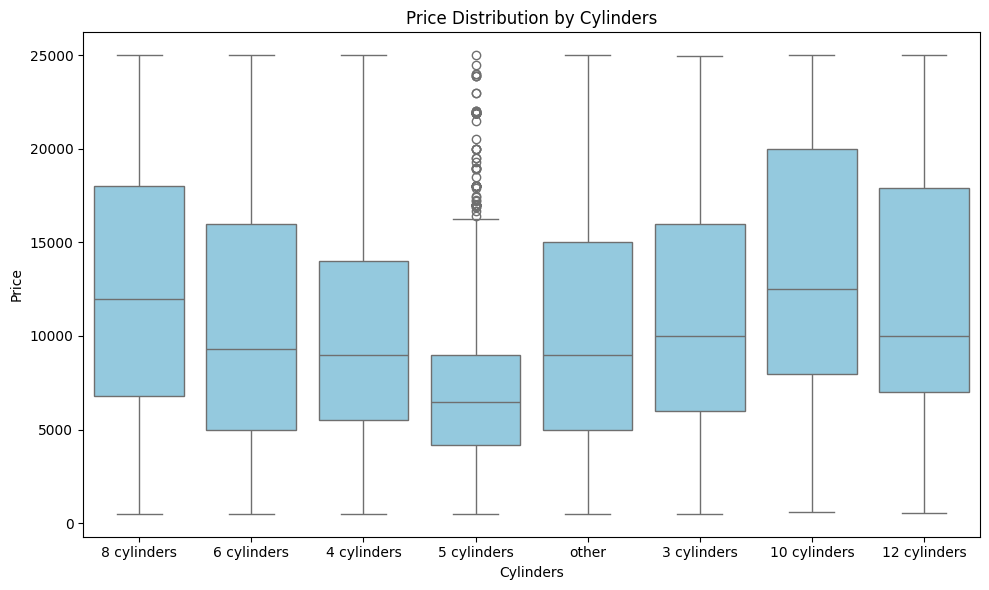

In [103]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean2,
    x="cylinders",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


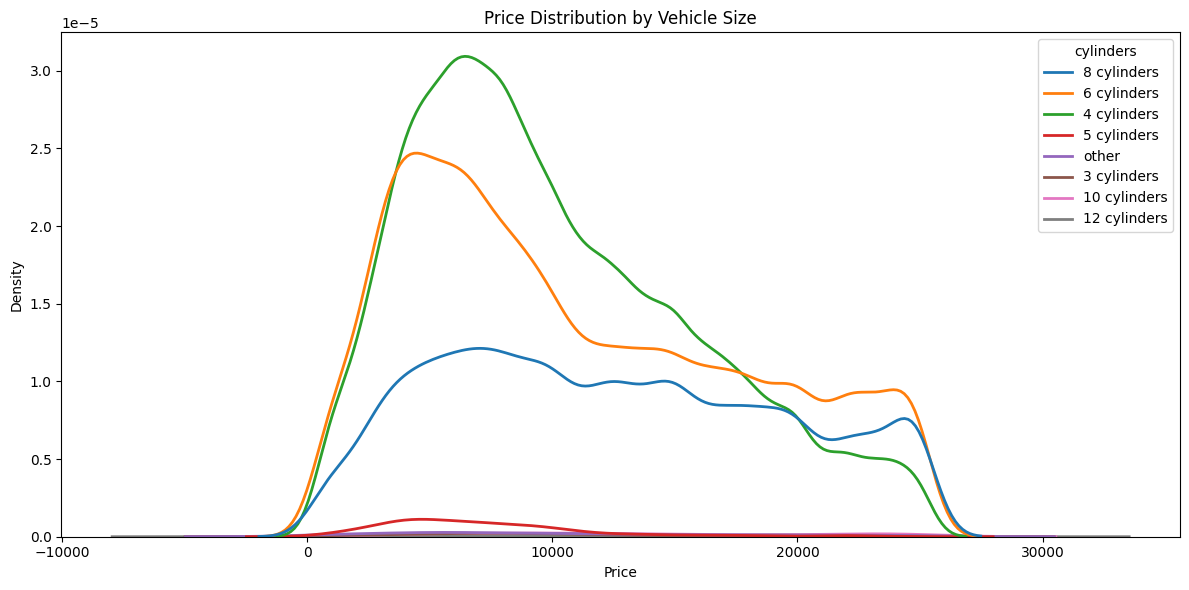

In [104]:
plt.figure(figsize=(12, 6))

sns.kdeplot(
    data=df_clean2,
    x="price",
    hue="cylinders",  # separate curves by size
    fill=False,  # keep it clean
    linewidth=2
)

plt.title("Price Distribution by Vehicle Size")
plt.xlabel("Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


In [105]:
df_clean2.groupby("cylinders")["price"].mean().sort_values(ascending=False)



cylinders
10 cylinders    13561.870924
8 cylinders     12433.618645
12 cylinders    11531.464286
6 cylinders     10951.333908
3 cylinders     10864.476190
other           10430.323097
4 cylinders     10077.459091
5 cylinders      7246.957276
Name: price, dtype: float64

In [106]:
df_clean2["cylinders"].value_counts()

cylinders
4 cylinders     65817
6 cylinders     59205
8 cylinders     37983
5 cylinders      1615
other             749
10 cylinders      736
3 cylinders       525
12 cylinders       84
Name: count, dtype: int64

In [107]:
df_clean2["cylinders"].value_counts(normalize=True).sort_values(ascending=False) * 100


cylinders
4 cylinders     39.478988
6 cylinders     35.512914
8 cylinders     22.783330
5 cylinders      0.968725
other            0.449272
10 cylinders     0.441475
3 cylinders      0.314911
12 cylinders     0.050386
Name: proportion, dtype: float64

From the mean price print out, while 10 and 12 cylinder vehicles command a high price (high mean), they represent a small percentage of the dataset (<1 %).  Four, six and eight cylinder vehicles represent the majority of the dataset population.  However, on viewing the box plot, the 6 cylinder vehicles vs 4 cylinder vehicles are indistinguishable.   Accordingly, we can drop **cylinders** from the list as predictors of price.

In [108]:
df_clean3 = df_clean2.drop(columns=["cylinders"])

In [109]:
non_null_pct = df_clean3.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id              100.000000
region          100.000000
price           100.000000
state           100.000000
year             99.868399
transmission     99.517464
odometer         99.420146
fuel             99.313980
model            98.722330
title_status     97.963321
manufacturer     96.026910
type             75.814211
drive            70.161644
paint_color      69.809971
condition        62.622431
dtype: float64

Now let's explore **condition**.

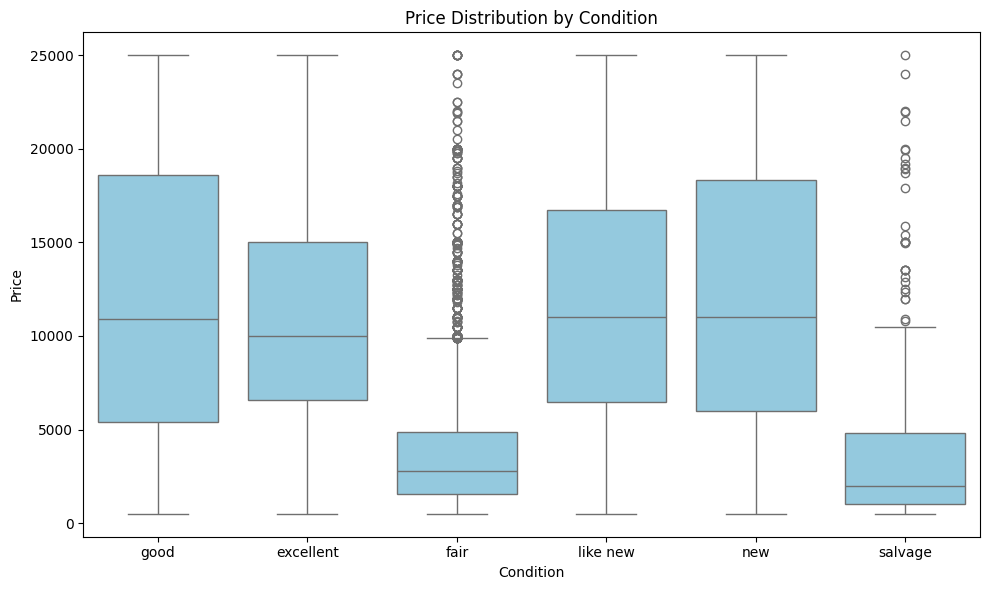

In [110]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean3,
    x="condition",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


From the box plot above, vehicles that are good, excellent, like new, and new command very similar prices in mean and variation around the mean.   We can collapse these four conditions into one, we'll call it
**good**.   The fair and salvage condition also share similar means and variation, we'll refer to this condition as **poor**.

In [111]:
df_clean3["condition_collapsed"] = df_clean3["condition"].replace({
    "salvage": "poor",
    "fair": "poor",
    "good": "good",
    "excellent": "good",
    "like new": "good",
    "new": "good"
})


In [112]:
df_clean4 = df_clean3.drop(columns=["condition"])

Now we need to decide how to treat missing condition data.

In [113]:
df_clean4["condition_collapsed"] = df_clean4["condition_collapsed"].fillna("missing")


In [114]:
df_clean4["condition_collapsed"].value_counts(dropna=False)


condition_collapsed
good       162753
missing    101396
poor         7126
Name: count, dtype: int64

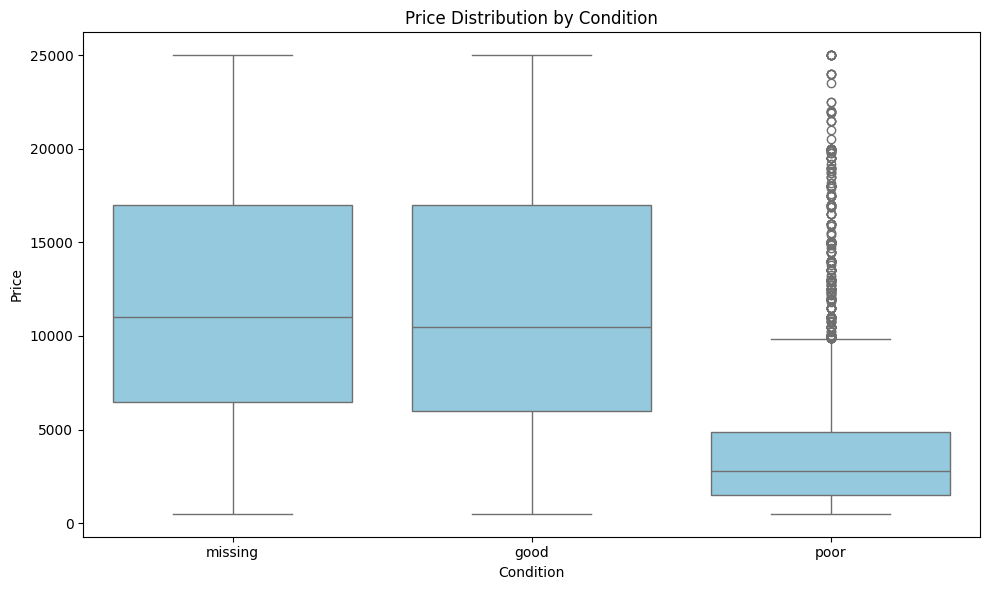

In [115]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean4,
    x="condition_collapsed",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


From the box plot above, the null or missing data behaves or presents similar to the good condition rating, which may mean on average missing means average or good condition.  However, poor presents much differently, in mean and in distribution, so we will keep this column, with the nulls indicated as **missing**.

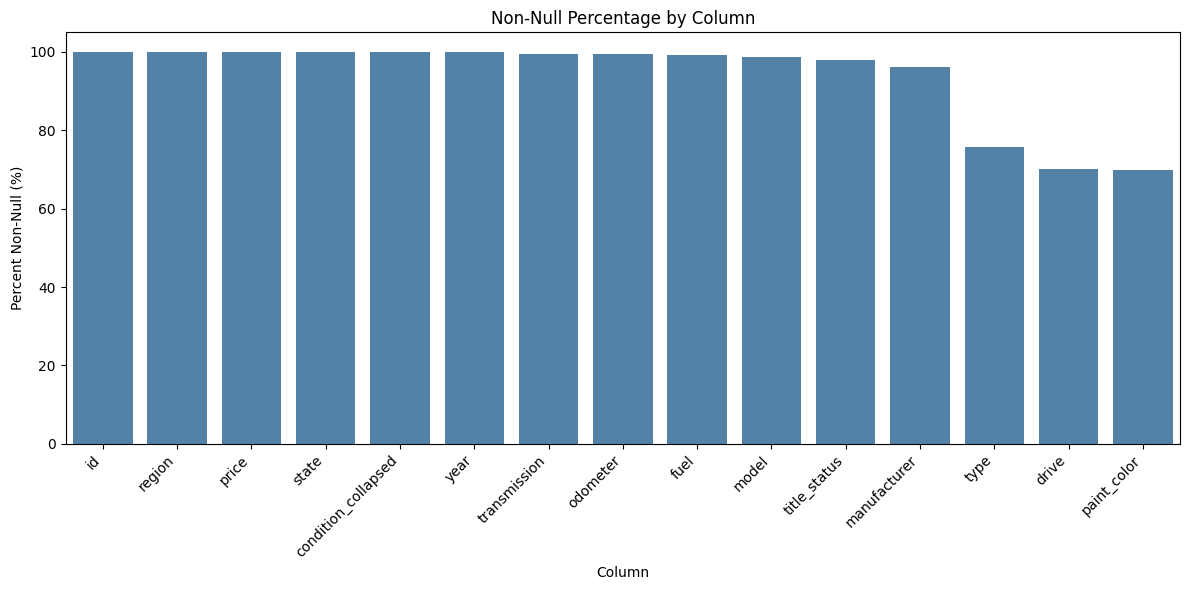

In [122]:

non_null_pct = df_clean4.notnull().mean().sort_values(ascending=False) * 100


plt.figure(figsize=(12, 6))

sns.barplot(
    x=non_null_pct.index,
    y=non_null_pct.values,
    color="steelblue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent Non‑Null (%)")
plt.xlabel("Column")
plt.title("Non‑Null Percentage by Column")
plt.tight_layout()
plt.show()


From the plot above, we need to investigate **type**, **drive**, and **paint color**, starting with **paint color**.

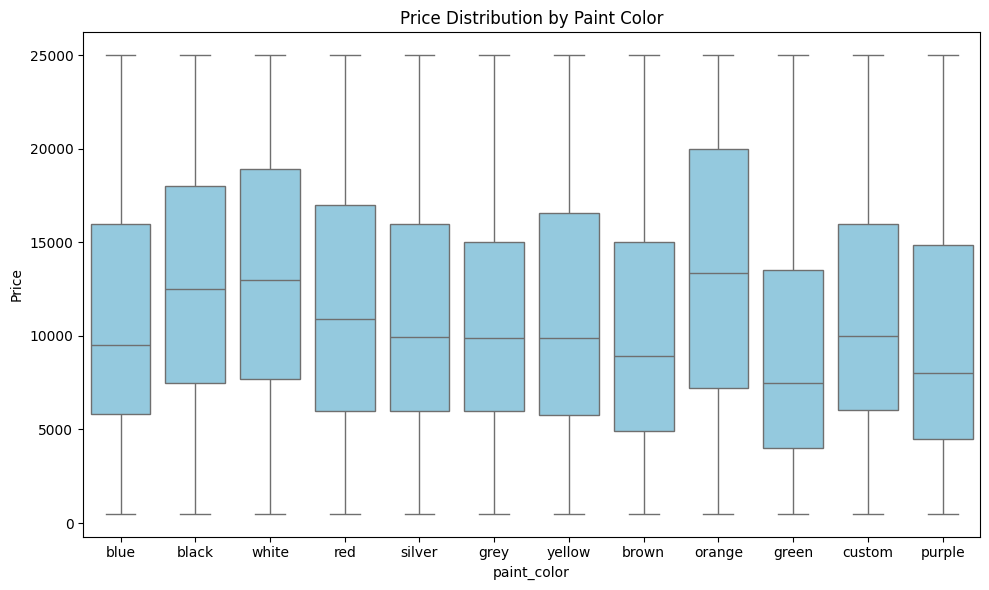

In [120]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean4,
    x="paint_color",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Paint Color")
plt.xlabel("paint_color")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [123]:
df_clean4.groupby("paint_color")["price"].mean().sort_values(ascending=False)



paint_color
orange    13281.347826
white     13254.266479
black     12821.406096
red       11754.356229
custom    11366.445903
yellow    11239.818624
silver    11211.309441
blue      11084.994104
grey      10894.360339
brown     10311.193618
purple     9997.144404
green      9134.717649
Name: price, dtype: float64

For paint_color, approximately 30% of the entries are null, or missing.  There are 10 paint colors, with means varying between $13,200 to $10,311.  There are three groupings, orange, black, white followed by red, custom, yellow, silver, blue, lastly grey and brown.  Before proceeding to keep or drop, let's replace the null values with **"missing"**, and replot the box plot.

In [127]:
df_clean4["paint_color"] = df_clean4["paint_color"].fillna("missing")


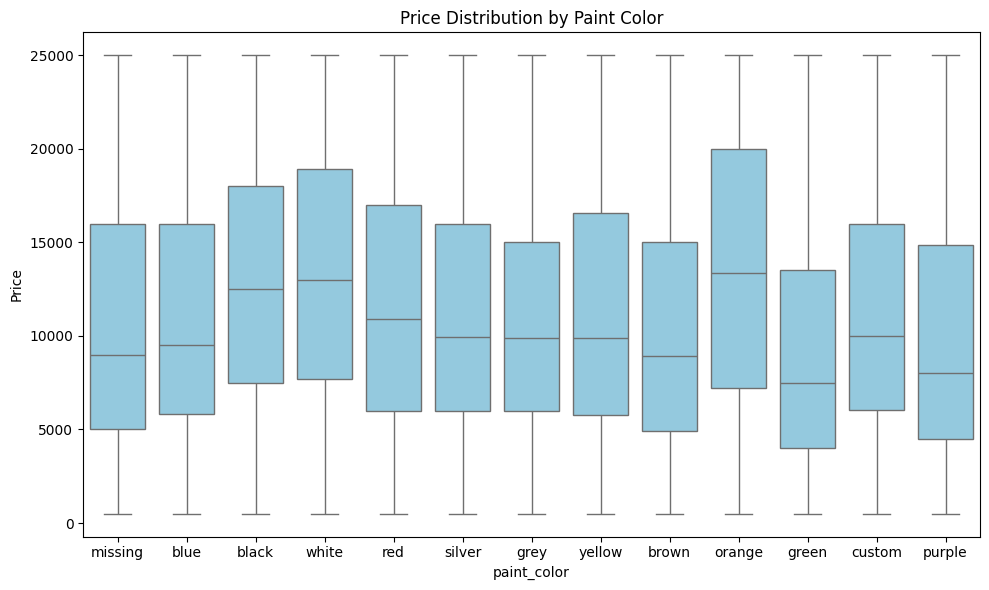

In [128]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean4,
    x="paint_color",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Paint Color")
plt.xlabel("paint_color")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


From above, the color, **missing** has a lower mean price, but has 25%-75% boxes with a similar spread indicating that the **missing** is not totally random, but may simply be a color that was mislabeled with null. For now, we will keep it, but designate another df_clean version since we replaced nulls with **missing**.

In [129]:
df_clean5 = df_clean4.copy() #df_clean5 indicates another operation to clean, replace paint_color nulls with "missing"

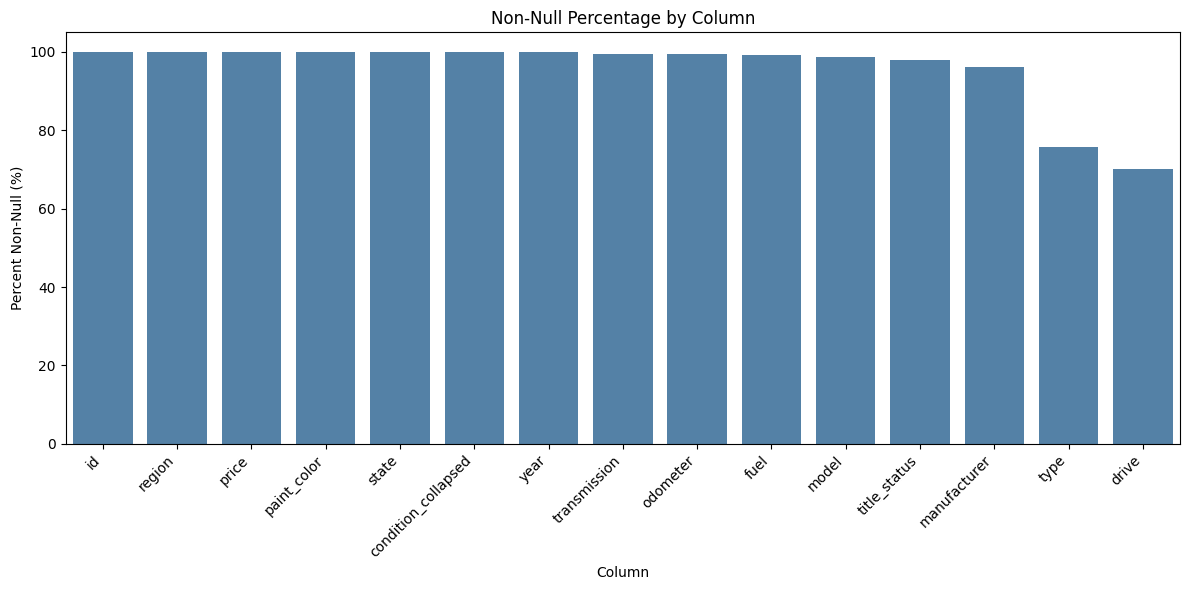

In [130]:

non_null_pct = df_clean5.notnull().mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 6))

sns.barplot(
    x=non_null_pct.index,
    y=non_null_pct.values,
    color="steelblue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent Non‑Null (%)")
plt.xlabel("Column")
plt.title("Non‑Null Percentage by Column")
plt.tight_layout()
plt.show()


Now we examine the **drive** column.

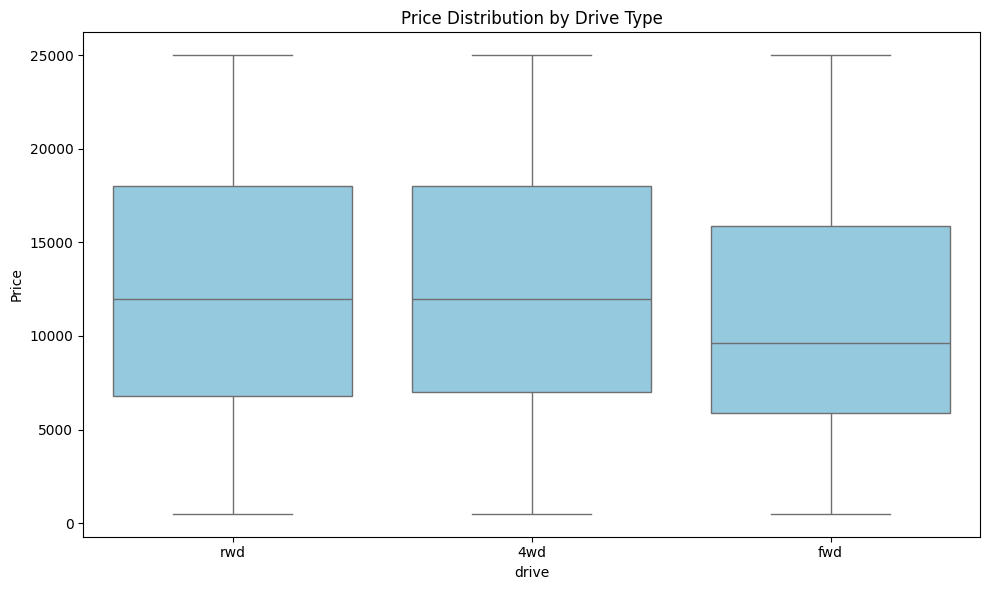

In [131]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean5,
    x="drive",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Drive Type")
plt.xlabel("drive")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


As before, let's label the drive null values, with **missing** and see how it plots relative to the other group types.

In [132]:
df_clean5["drive"] = df_clean5["drive"].fillna("missing")


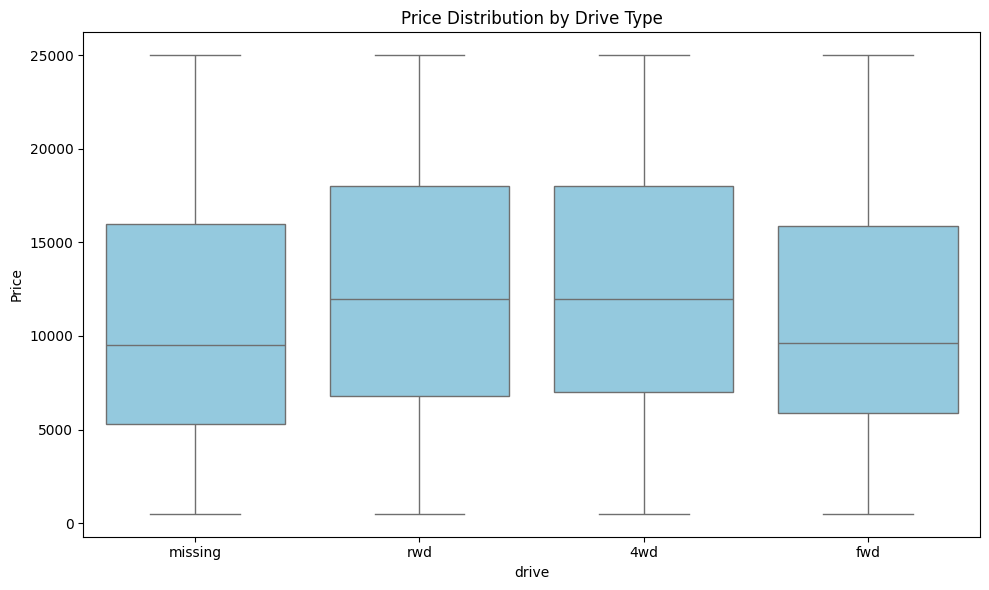

In [133]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean5,
    x="drive",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Drive Type")
plt.xlabel("drive")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


From the above plot, the missing entries, like the paint color analysis before, do not seem to be random, but present similar to a separate type of drive, so we will keep the **drive** column with null values replaced with the missing text.

In [134]:
df_clean6 = df_clean5.copy() #df_clean6 indicates another operation to clean, replace drive nulls with "missing"

Now we are ready to explore the **type** column.

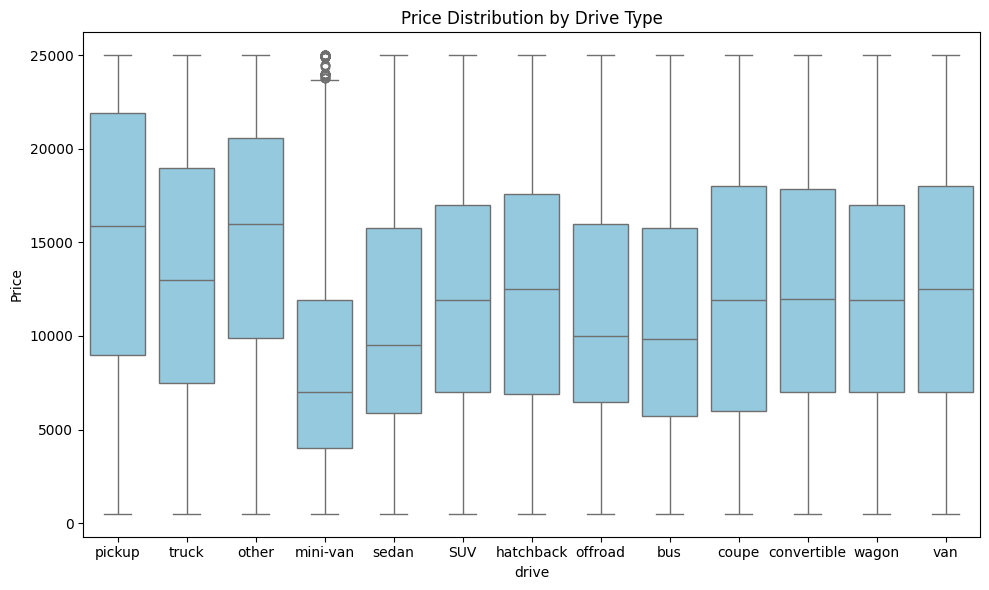

In [135]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean6,
    x="type",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Drive Type")
plt.xlabel("drive")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


The variation in mean price between a pickup and a mini-van is significant enough to keep this column.   Now let's explore the nature of the null values by replacing those intries with the **missing* text.

In [136]:
df_clean6["type"] = df_clean6["type"].fillna("missing")


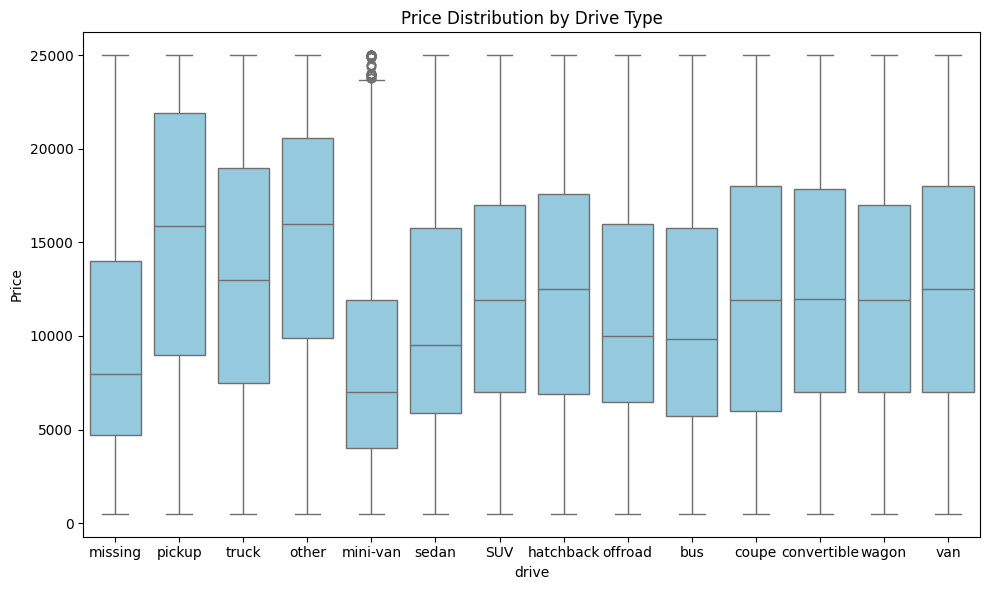

In [137]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean6,
    x="type",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Drive Type")
plt.xlabel("drive")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


As the two prior categories, **missing** doesn't seem to be random, so we will also keep these values.

In [138]:
df_clean7 = df_clean6.copy()  #df_clean7 indicates another operation to clean, replace type nulls with "missing"

Let's have one final look at the data.

In [139]:
non_null_pct = df_clean7.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id                     100.000000
region                 100.000000
price                  100.000000
drive                  100.000000
type                   100.000000
paint_color            100.000000
state                  100.000000
condition_collapsed    100.000000
year                    99.868399
transmission            99.517464
odometer                99.420146
fuel                    99.313980
model                   98.722330
title_status            97.963321
manufacturer            96.026910
dtype: float64

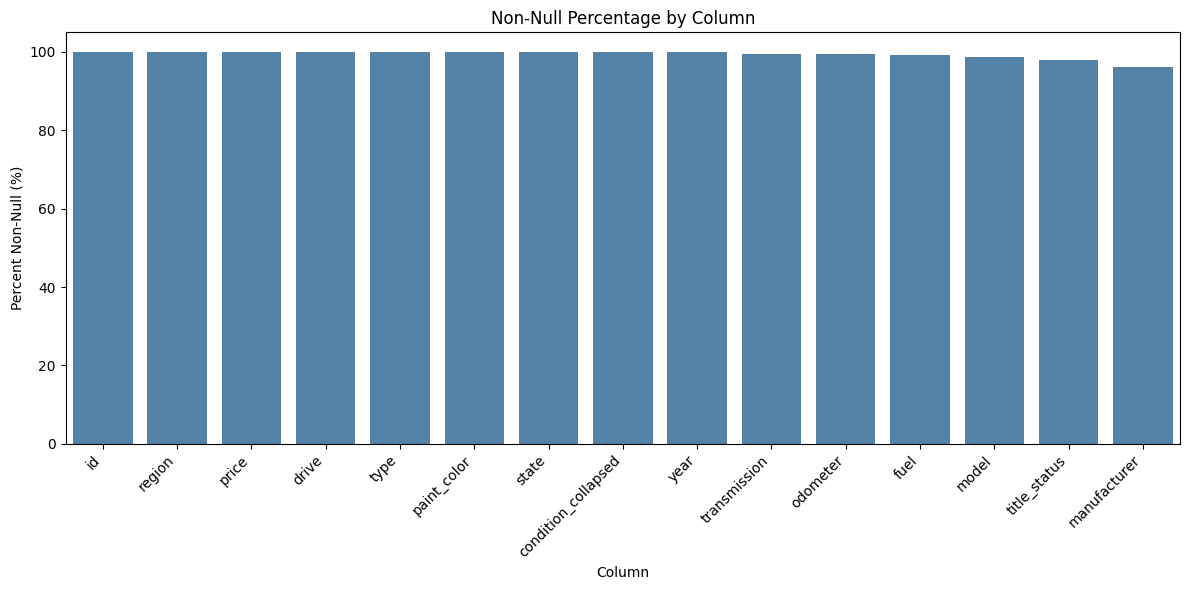

In [140]:
#here's a simple plot of the data above
plt.figure(figsize=(12, 6))

sns.barplot(
    x=non_null_pct.index,
    y=non_null_pct.values,
    color="steelblue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent Non‑Null (%)")
plt.xlabel("Column")
plt.title("Non‑Null Percentage by Column")
plt.tight_layout()
plt.show()


From above, our dataset is robust, with only 4% of the values missing from manufacturer, accordingly, we will remove all null values from the rest of the columns, and indicate the df as df_cleaned, **yay**.

In [141]:
df_cleaned = df_clean7.dropna()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.